## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






In [ ]:
pip install beautifulsoup4 requests


# Web scrapping  -

In [ ]:
# importing important libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# ETL -
# step1 - extract
page = 10
header = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"}
url = f"https://www.timesjobs.com/candidate/job-search.html?from=submit&luceneResultSize=25&txtKeywords=data%20science&postWeek=60&searchType=personalizedSearch&actualTxtKeywords=Data%20Science&searchBy=0&rdoOperator=OR&txtLocation=India&pDate=I&sequence=2&startPage={page}"

r = requests.get(url,header)

soup  = BeautifulSoup(r.content,"html.parser")


In [ ]:
# step2 - transform

# the information we want - job descriptions, qualifications, locations, and salaries.

jobs = soup.find_all('li',class_= "clearfix job-bx wht-shd-bx")
jobs_list = []
for item in jobs:
  # job title
  job_title = item.find('h2').text.strip()
  # company name
  company_name = item.find('h3',class_='joblist-comp-name').text.strip()
  company_name = company_name.replace('(More Jobs)', '').strip()
  # experience
  exprience = item.find('li').text.strip()[11:]
  # salary
  li_tags = item.find('ul', class_='top-jd-dtl clearfix').find_all('li')
  if len(li_tags) == 2:
    salary = None
  else:
    salary = item.find('ul', class_='top-jd-dtl clearfix').find_all('li')[1].text.strip()
  # location
  if len(li_tags) == 2:
    location = item.find('ul', class_='top-jd-dtl clearfix').find_all('li')[1].text.strip()
  else:
    location = item.find('ul', class_='top-jd-dtl clearfix').find_all('li')[2].text.strip()
  location = location.replace('location_on\n','').strip()
  # job description
  job_description = item.find('ul',class_='list-job-dtl clearfix').find_all('li')[0].text.strip()
  job_description = job_description.replace('Job Description:\r\n','').strip()


  jobs = {'job title':job_title,
          'company name':company_name,
          'exprience':exprience,
          'salary':salary,
          'location':location,
          'job description':job_description


  }

  jobs_list.append(jobs)


In [ ]:
# step3 - load
df = pd.DataFrame(jobs_list)
df

,job title,company name,exprience,salary,location,job description
0,DATA SCIENCE INTERNSHIP IN PUNE,Maxgen Technologies,0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",Maxgen Technologies pvt ltd offering live proj...
1,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,None,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",Maxgen Technologies pvt ltd offering live proj...
2,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",Maxgen Technologies pvt ltd offering live proj...
3,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.,"Pune, Amravati, Aurangabad, Sangli, Satara",Maxgen Technologies Pvt Ltd is an it company b...
4,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.,"Pune, Amravati, Aurangabad, Sangli, Satara",Maxgen Technologies pvt ltd offering internshi...
5,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.,"Pune, Amravati, Aurangabad, Sangli, Satara",Maxgen Technologies pvt ltd offering internshi...
6,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.,"Pune, Amravati, Aurangabad, Sangli, Satara",Maxgen Technologies pvt ltd offering internshi...
7,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",Maxgen technologies Pvt ltd offers live projec...
8,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.,"Pune, Amravati, Aurangabad, Sangli, Satara",Maxgen Technologies pvt ltd offering internshi...
9,Director of Data Science,Deal4loans,5 - 8 yrs,None,Noida/Greater Noida,"Director of Data Science Location:Noida , Utt..."


# EDA -

In [ ]:
df

,job title,company name,exprience,salary,location,job description
0,Data Science Analyst,Electrobrain modern technologies pvt ltd,2 - 7 yrs,₹Rs 4.15 - 8.40 Lacs p.a.,"Gurgaon, Hyderabad/Secunderabad, Mumbai, No...",Define requirements for analysis in a given bu...
1,Data Science Internship in Mumbai,Maxgen Technologies,0 - 1 yrs,None,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Maxgen technologies is an it company based in ...
2,Data Science Internship in Ahmedabad,Maxgen Technologies,0 - 1 yrs,None,"Ahmedabad, Bhavnagar, Gandhinagar, Jamnagar...",Maxgen Technologies pvt ltd offering live proj...
3,Business Analyst - Data Science,Electrobrain modern technologies pvt ltd,2 - 7 yrs,₹Rs 3.20 - 6.50 Lacs p.a.,"Chandigarh, Vijayawada, Visakhapatnam, Mang...",Own and execute audience analytics projects by...
4,Data Science Trainee,Electrobrain modern technologies pvt ltd,3 - 8 yrs,₹Rs 3.10 - 5.50 Lacs p.a.,"Aurangabad, Bhiwandi, Bhusawal, Lonavala, ...","Selecting features , building and optimizing ..."
5,Business Analyst - Data Science,Electrobrain modern technologies pvt ltd,2 - 7 yrs,₹Rs 3.20 - 6.50 Lacs p.a.,"Gurgaon, Hyderabad/Secunderabad, Mumbai, No...",Own and execute audience analytics projects by...
6,Data Science Trainee,Electrobrain modern technologies pvt ltd,3 - 8 yrs,₹Rs 3.10 - 5.50 Lacs p.a.,"Ghaziabad, Gorakhpur, Kanpur, Lucknow, Mat...","Selecting features , building and optimizing ..."
7,Data Science Engineer,Electrobrain modern technologies pvt ltd,2 - 7 yrs,₹Rs 4.15 - 7.60 Lacs p.a.,"Gondia, Hinganghat, Mahabaleshwar, Nasik, ...","Implement data preprocessing , feature engine..."
8,Data Science Internship in Mumbai,Maxgen Technologies,0 - 1 yrs,None,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Maxgen Technologies pvt ltd offering internshi...
9,Data Science Trainee,Electrobrain modern technologies pvt ltd,3 - 8 yrs,₹Rs 3.10 - 5.50 Lacs p.a.,"Agra, Aligarh, Allahabad, Bareilly, Faizabad","Selecting features , building and optimizing ..."


In [ ]:
# extracting minimum exp and maximum exp from exprience and changing its data type -
df[['min_exp', 'max_exp']] = df['exprience'].str.replace(' yrs', '').str.split('-', expand=True)

df['min_exp'] = df['min_exp'].astype(int)
df['max_exp'] = df['max_exp'].astype(int)

# df.drop(columns=['exprience'], inplace=True)


In [ ]:
# extracting minimum salary and maximum salary from salary column
df['salary'] = df['salary'].str.replace('₹Rs', '')
df[['min_salary', 'max_salary']] = df['salary'].str.replace('Lacs p.a.', '').str.split('-', expand=True)


<ipython-input-8-5981faceb117>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[['min_salary', 'max_salary']] = df['salary'].str.replace('Lacs p.a.', '').str.split('-', expand=True)


In [ ]:
# changing data type to float
df['min_salary'] = df['min_salary'].astype(float)
df['max_salary'] = df['max_salary'].astype(float)

# visualization -

In [ ]:
# importing required libraries for visualization
import seaborn as sb
import matplotlib.pyplot as plt


In [ ]:
df

,job title,company name,exprience,salary,location,job description,min_exp,max_exp,min_salary,max_salary
0,Data Science Analyst,Electrobrain modern technologies pvt ltd,2 - 7 yrs,4.15 - 8.40 Lacs p.a.,"Gurgaon, Hyderabad/Secunderabad, Mumbai, No...",Define requirements for analysis in a given bu...,2,7,4.15,8.40
1,Data Science Internship in Mumbai,Maxgen Technologies,0 - 1 yrs,None,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Maxgen technologies is an it company based in ...,0,1,NaN,NaN
2,Data Science Internship in Ahmedabad,Maxgen Technologies,0 - 1 yrs,None,"Ahmedabad, Bhavnagar, Gandhinagar, Jamnagar...",Maxgen Technologies pvt ltd offering live proj...,0,1,NaN,NaN
3,Business Analyst - Data Science,Electrobrain modern technologies pvt ltd,2 - 7 yrs,3.20 - 6.50 Lacs p.a.,"Chandigarh, Vijayawada, Visakhapatnam, Mang...",Own and execute audience analytics projects by...,2,7,3.20,6.50
4,Data Science Trainee,Electrobrain modern technologies pvt ltd,3 - 8 yrs,3.10 - 5.50 Lacs p.a.,"Aurangabad, Bhiwandi, Bhusawal, Lonavala, ...","Selecting features , building and optimizing ...",3,8,3.10,5.50
5,Business Analyst - Data Science,Electrobrain modern technologies pvt ltd,2 - 7 yrs,3.20 - 6.50 Lacs p.a.,"Gurgaon, Hyderabad/Secunderabad, Mumbai, No...",Own and execute audience analytics projects by...,2,7,3.20,6.50
6,Data Science Trainee,Electrobrain modern technologies pvt ltd,3 - 8 yrs,3.10 - 5.50 Lacs p.a.,"Ghaziabad, Gorakhpur, Kanpur, Lucknow, Mat...","Selecting features , building and optimizing ...",3,8,3.10,5.50
7,Data Science Engineer,Electrobrain modern technologies pvt ltd,2 - 7 yrs,4.15 - 7.60 Lacs p.a.,"Gondia, Hinganghat, Mahabaleshwar, Nasik, ...","Implement data preprocessing , feature engine...",2,7,4.15,7.60
8,Data Science Internship in Mumbai,Maxgen Technologies,0 - 1 yrs,None,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Maxgen Technologies pvt ltd offering internshi...,0,1,NaN,NaN
9,Data Science Trainee,Electrobrain modern technologies pvt ltd,3 - 8 yrs,3.10 - 5.50 Lacs p.a.,"Agra, Aligarh, Allahabad, Bareilly, Faizabad","Selecting features , building and optimizing ...",3,8,3.10,5.50


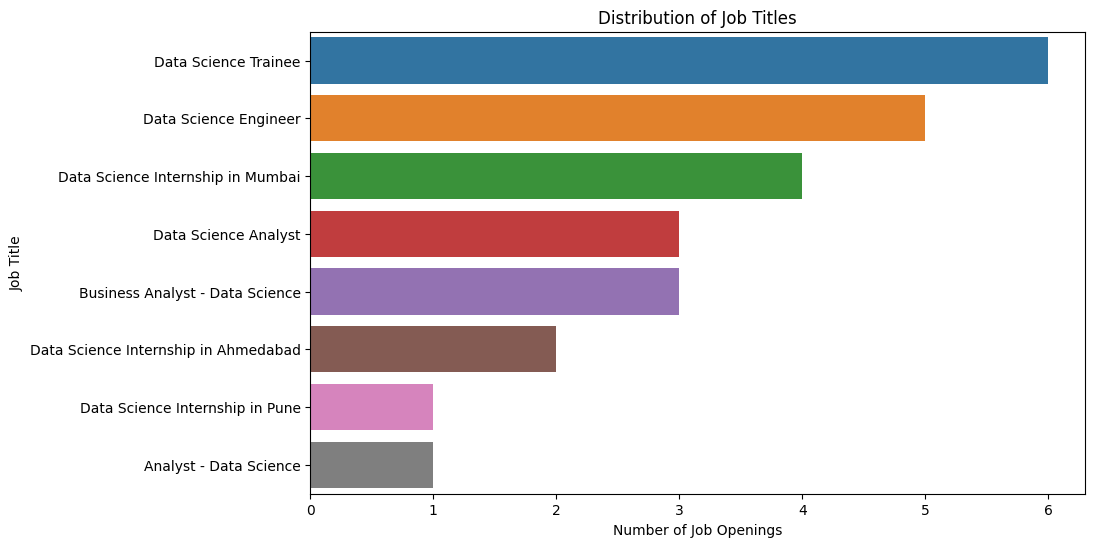

In [ ]:
# 1. distribution of job titles
plt.figure(figsize=(10, 6))
sb.countplot(y='job title', data=df, order=df['job title'].value_counts().index)
plt.title('Distribution of Job Titles')
plt.xlabel('Number of Job Openings')
plt.ylabel('Job Title')
plt.show()

* chart type : count plot

* insights : Job titles with longer bars are in higher demand, based on the available job openings. This information can be valuable for job seekers or individuals looking to understand the current market demand for specific skills or roles.



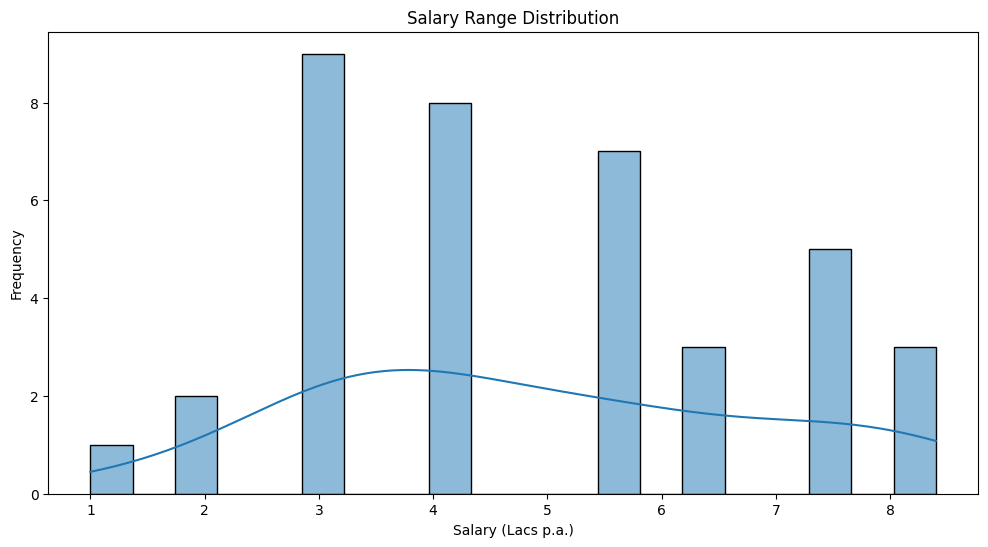

In [ ]:
# 2. salary range distribution
plt.figure(figsize=(12, 6))
sb.histplot(df[['min_salary', 'max_salary']].stack(), bins=20, kde=True)
plt.title('Salary Range Distribution')
plt.xlabel('Salary (Lacs p.a.)')
plt.ylabel('Frequency')
plt.show()

* chart type : histogram with kde

* insights :  The histogram shows the spread of salary ranges, indicating how frequently different salary levels occur in the dataset.  
Peaks or clusters in the histogram reveal common salary ranges.

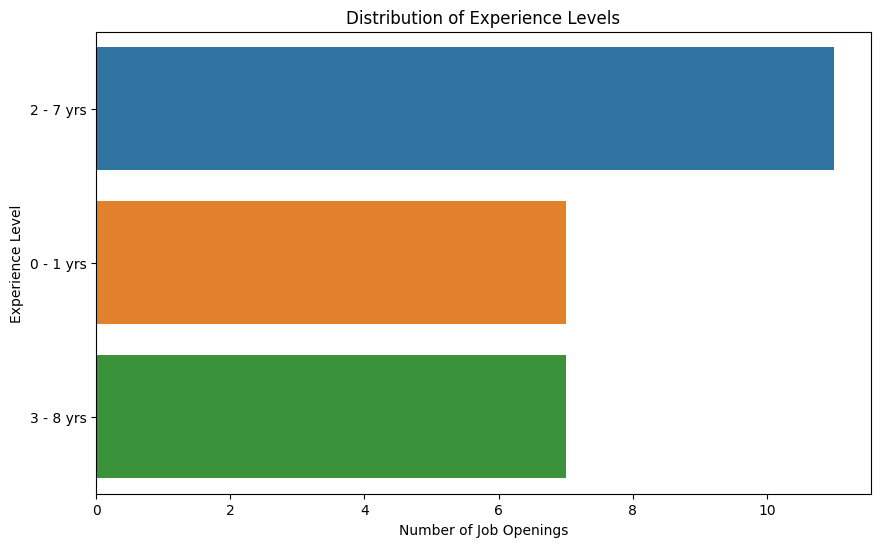

In [ ]:
# 3. distribution of experience level
plt.figure(figsize=(10, 6))
sb.countplot(y='exprience', data=df, order=df['exprience'].value_counts().index)
plt.title('Distribution of Experience Levels')
plt.xlabel('Number of Job Openings')
plt.ylabel('Experience Level')
plt.show()

* chart type : countplot

* insights :  The plot shows which experience levels are most in demand based on the number of job openings. Longer bars indicate higher demand for a particular experience level.

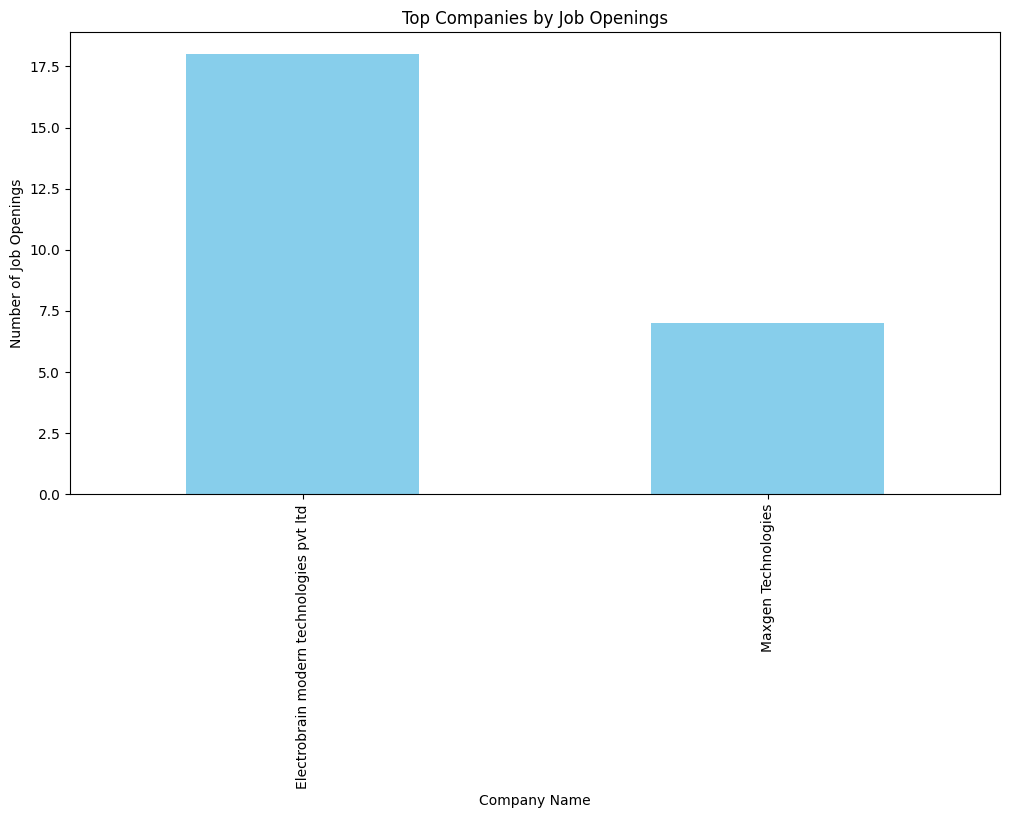

In [ ]:
# 4. Top Companies by Job Openings
top_companies = df['company name'].value_counts()

plt.figure(figsize=(12, 6))
top_companies.plot(kind='bar', color='skyblue')
plt.title('Top Companies by Job Openings')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Openings')
plt.show()

* chart type : bar plot

* insights : The chart identifies which companies have the highest number of job openings. Longer bars indicate companies with more job opportunities.

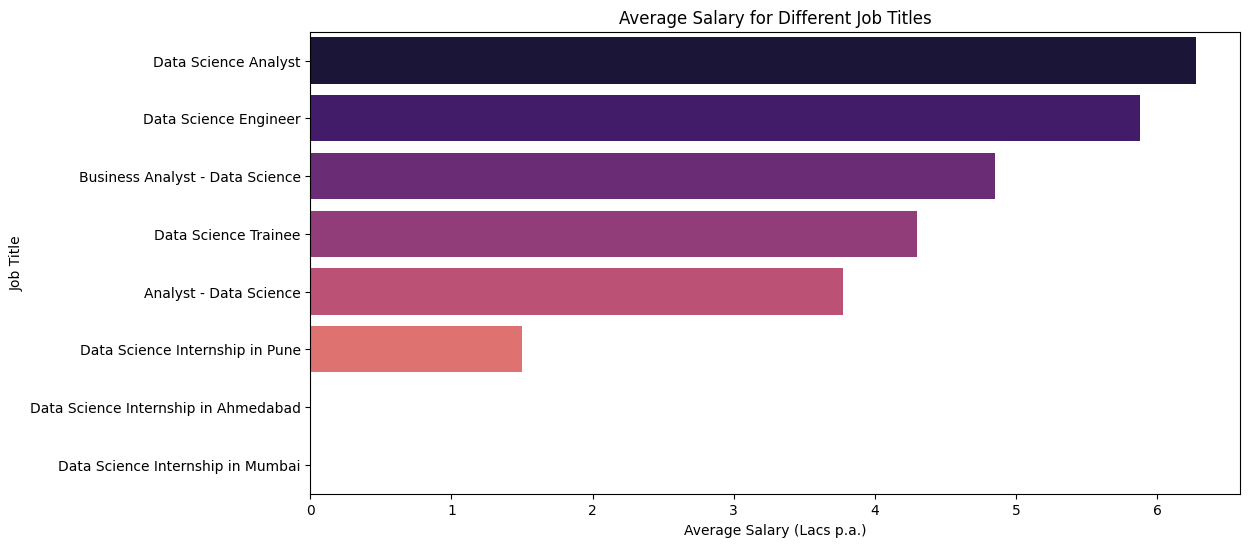

In [ ]:
# 5. average salary by job role -
avg_salary_by_title = df.groupby('job title')[['min_salary', 'max_salary']].mean()

plt.figure(figsize=(12, 6))
avg_salary_by_title['average_salary'] = avg_salary_by_title.mean(axis=1)
avg_salary_by_title.sort_values(by='average_salary', ascending=False, inplace=True)

sb.barplot(x='average_salary', y=avg_salary_by_title.index, data=avg_salary_by_title, palette='magma')
plt.title('Average Salary for Different Job Titles')
plt.xlabel('Average Salary (Lacs p.a.)')
plt.ylabel('Job Title')
plt.show()

* chart type :horizontal bar plot

* insights : The chart allows for a quick comparison of average salaries across different job titles. Longer bars indicate higher average salaries.

**Overall Conclusion:**

The data suggests a dynamic job market with opportunities for candidates with various experience levels.

Certain job titles and companies stand out for their higher demand and potentially more competitive salaries.

Job seekers should consider factors such as location preferences and align their expectations with industry standards.

Employers can leverage insights to refine their recruitment strategies and understand salary competitiveness.